In [1]:
%matplotlib inline

import pandas as pd
import numpy as np

import Constants as C
from PlotTool import PlotTool
from Loader import Loader
from Cuts import qlayerCut, firstHitInOuter, maxDistMaxDoms, balloonCut
from Cuts import qratio, getNStrings

import matplotlib.pyplot as plt


In [2]:
# Load the data
#load = Loader('NPE>1000')
load = Loader(C.basesel+'&& ImpLF_rchi2 > 80')

extrab = ['q_string','hs_q_tot_pulses']
nue_juliet = load.getNuEJuliet(extraBranches=extrab)
nue_nugen = load.getNuE(extraBranches=extrab)
nue_nugen['w'] = nue_nugen['wE2']

In [25]:
# Add some necessary variables
def addqratio(dt):
    dt['qratio'] = pd.Series(qratio(dt),index=dt.index)
    return dt

def addmaxdist(dt):
    dt['maxDist'] = pd.Series(maxDistMaxDoms(dt),index=dt.index)
    return dt

nue_juliet = addqratio(nue_juliet)
nue_nugen  = addqratio(nue_nugen)
nue_juliet = addmaxdist(nue_juliet)
nue_nugen  = addmaxdist(nue_nugen)

# String counting
nue_juliet['nstrings2'] = getNStrings(nue_juliet,2)
nue_juliet['nstrings3'] = getNStrings(nue_juliet,3)
nue_juliet['nstrings4'] = getNStrings(nue_juliet,4)
nue_juliet['nstrings5'] = getNStrings(nue_juliet,5)
nue_juliet['nstrings6'] = getNStrings(nue_juliet,6)
nue_juliet['nstrings7'] = getNStrings(nue_juliet,7)
nue_juliet['nstrings8'] = getNStrings(nue_juliet,8)
nue_juliet['nstrings9'] = getNStrings(nue_juliet,9)
nue_juliet['nstrings10'] = getNStrings(nue_juliet,10)

nue_nugen['nstrings2'] = getNStrings(nue_nugen,2)
nue_nugen['nstrings3'] = getNStrings(nue_nugen,3)
nue_nugen['nstrings4'] = getNStrings(nue_nugen,4)
nue_nugen['nstrings5'] = getNStrings(nue_nugen,5)
nue_nugen['nstrings6'] = getNStrings(nue_nugen,6)
nue_nugen['nstrings7'] = getNStrings(nue_nugen,7)
nue_nugen['nstrings8'] = getNStrings(nue_nugen,8)
nue_nugen['nstrings9'] = getNStrings(nue_nugen,9)
nue_nugen['nstrings10'] = getNStrings(nue_nugen,10)

In [26]:
print len(nue_juliet)
print len(nue_nugen)

11061
954922


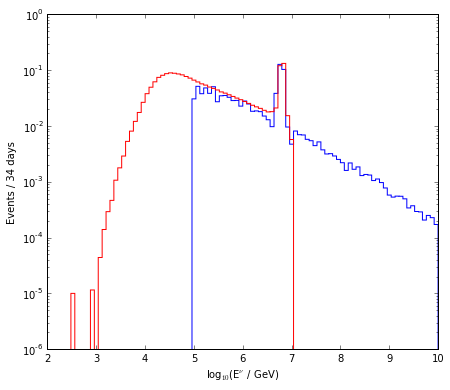

In [27]:
fig, ax = plt.subplots(ncols=1,figsize=(7,6))

plt.hist(np.log10(nue_juliet.juliet_PrimE),
         weights=nue_juliet.wE2,
         histtype='step',bins=100,
         label='juliet',
         range=(2,10))
         

plt.hist(np.log10(nue_nugen.PrimaryNeutrinoEnergy),
         weights=nue_nugen.wE2,
         color='r',
         histtype='step',bins=100,
        label='nugen',
        range=(2,10))
plt.xlabel(r'log$_{10}$(E$^{\nu}$ / GeV)')
plt.ylabel(C.lt_label)

ax.set_ylim([1e-6,1])
ax.set_yscale('log')

In [28]:
# Simple method to plot basic vars
def plot(info, var, xl, nbins, xmin, xmax, logy, ysf=1e-10):
    fig, ax = plt.subplots(ncols=1,figsize=(7,6))
    ymax = -9999
    for i in range(len(info['data'])):
        dt  = info['data'][i]
        col = info['col'][i]
        lbl = info['lbl'][i]
        ls  = info['ls'][i]
        w   = info['w'][i]
        bc, bins, p = plt.hist(dt[var].as_matrix(),
                               weights=dt[w].as_matrix(),
                               bins=nbins, range=(xmin,xmax),
                               color=col, label=lbl, lw=1.5,
                               histtype='step', ls = ls
                               )
        
        plt.xlabel(xl)
        plt.ylabel(C.lt_label)
        plt.tight_layout()
    
        if bc.max() > ymax:
            ymax = bc.max()
    
    if logy:
        ax.set_yscale('log')
        plt.ylim([ymax*ysf,5*ymax])
    plt.legend(loc='best',fontsize='medium')
    plt.grid()
    
# Also initialize the plot tool
pt = PlotTool()

In [29]:
# info to be plotted
nue_nugen_reg = nue_nugen[ (nue_nugen.PrimaryNeutrinoEnergy > 1e5) & (nue_nugen.PrimaryNeutrinoEnergy < 1e6)]
nue_juliet_reg = nue_juliet[ (nue_juliet.juliet_PrimE > 1e5) & (nue_juliet.juliet_PrimE < 1e6)]

info = {'data' : [nue_nugen_reg, nue_juliet_reg],
        'names'  : ['NuGen', r'Juliet'],
        'colors'  : ['r','b'],
        'weights'    : ['wE2','wE2'],
        'ls'   : ['solid','solid'],
        'lw' : [1.5,1.5],
        'marker' : [' ',' ']
       }

In [30]:
# Setup the variables
variables = {'hm_nhit_strings': [86,0,86,'hitstrings','N Hit Strings'],
             #'nstrings1' : [86,0,86,'hitstrings1','N Hit Strings (> 1 PE)'],
             'nstrings2' : [86,0,86,'hitstrings2','N Hit Strings (> 2 PE)'],
             'nstrings3' : [86,0,86,'hitstrings3','N Hit Strings (> 3 PE)'],
             'nstrings4' : [86,0,86,'hitstrings4','N Hit Strings (> 4 PE)'],
             'nstrings5' : [86,0,86,'hitstrings5','N Hit Strings (> 5 PE)'],
             'nstrings6' : [86,0,86,'hitstrings6','N Hit Strings (> 6 PE)'],
             'nstrings7' : [86,0,86,'hitstrings7','N Hit Strings (> 7 PE)'],
             'nstrings8' : [86,0,86,'hitstrings8','N Hit Strings (> 8 PE)'],
             'nstrings9' : [86,0,86,'hitstrings9','N Hit Strings (> 9 PE)'],
             'nstrings10' : [86,0,86,'hitstrings10','N Hit Strings (> 10 PE)'],

            }

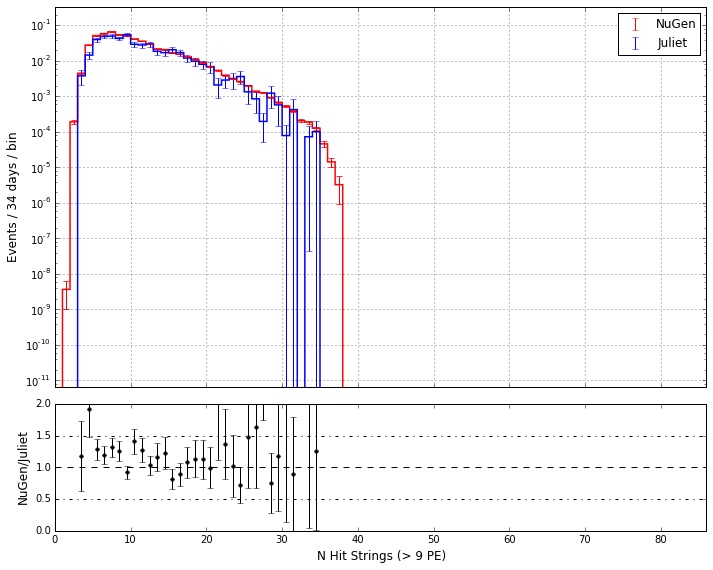

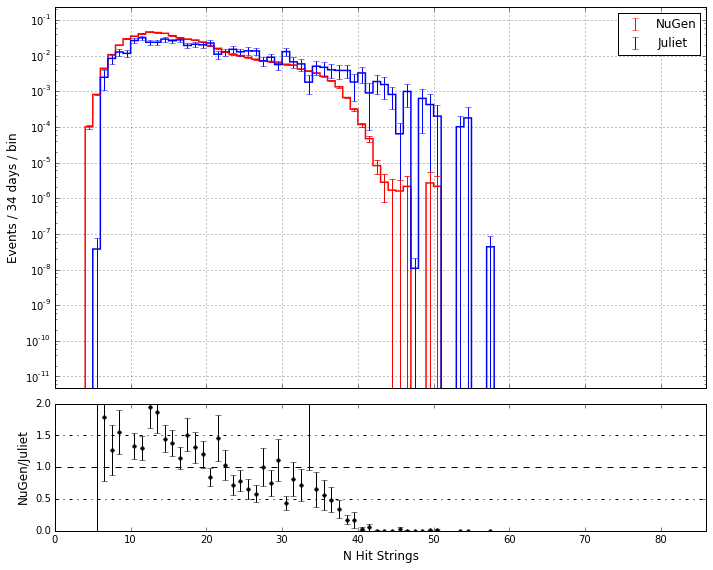

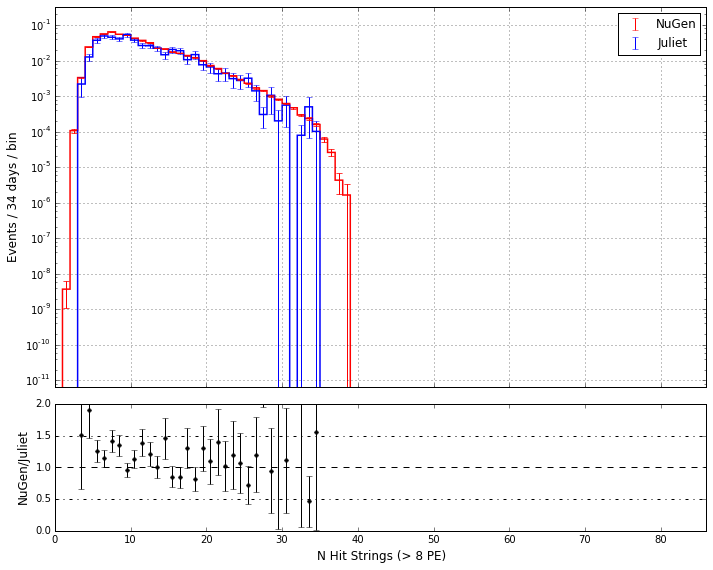

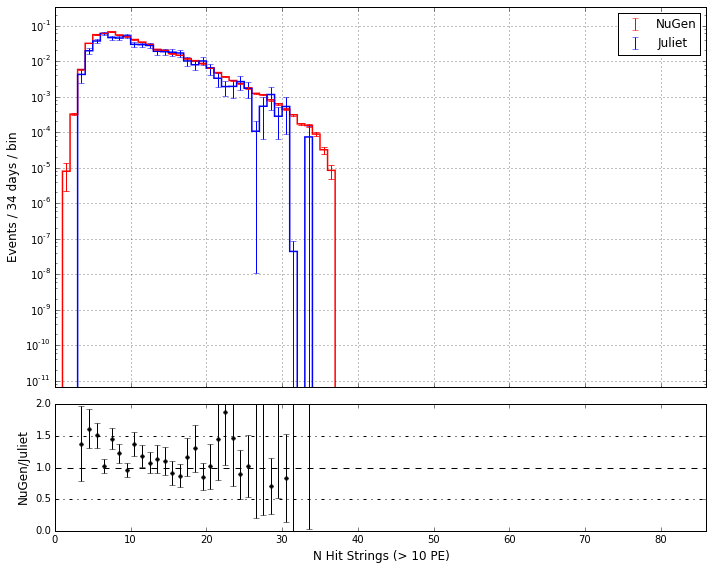

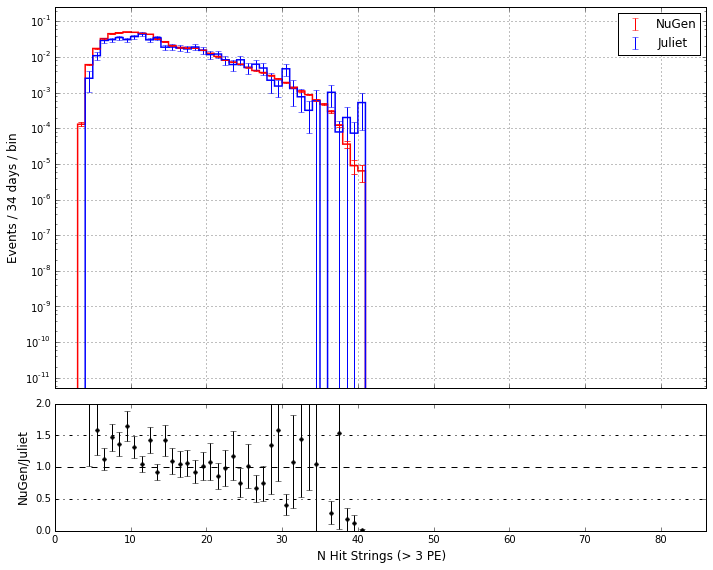

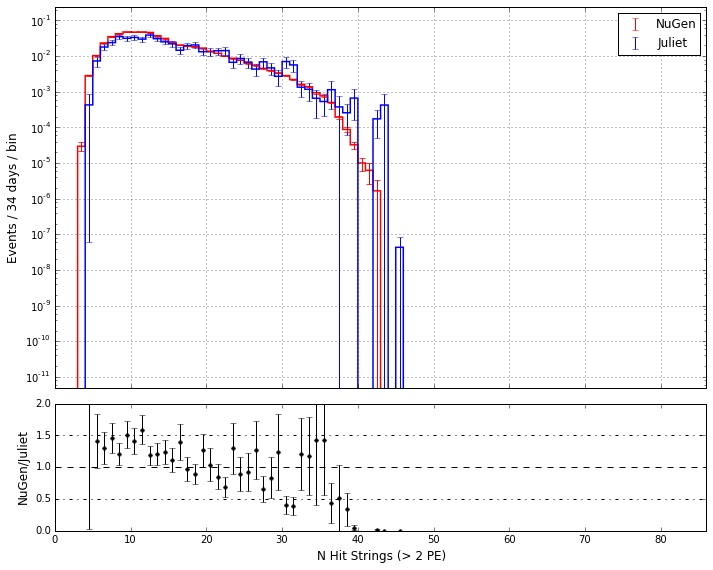

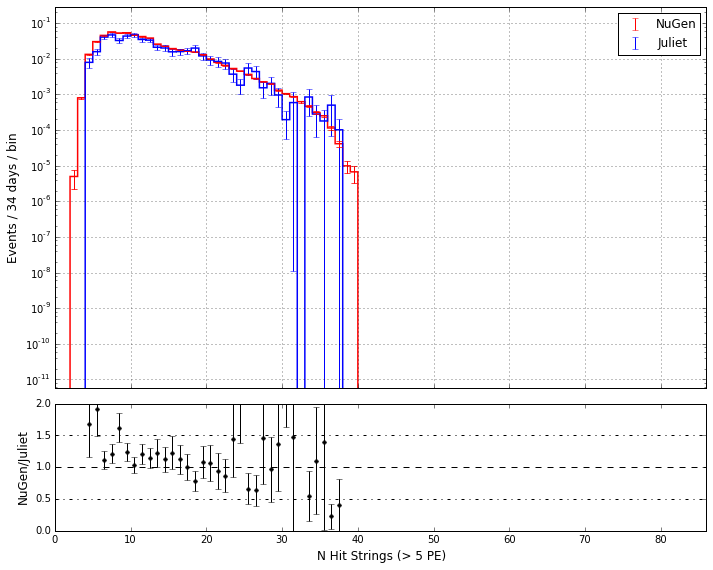

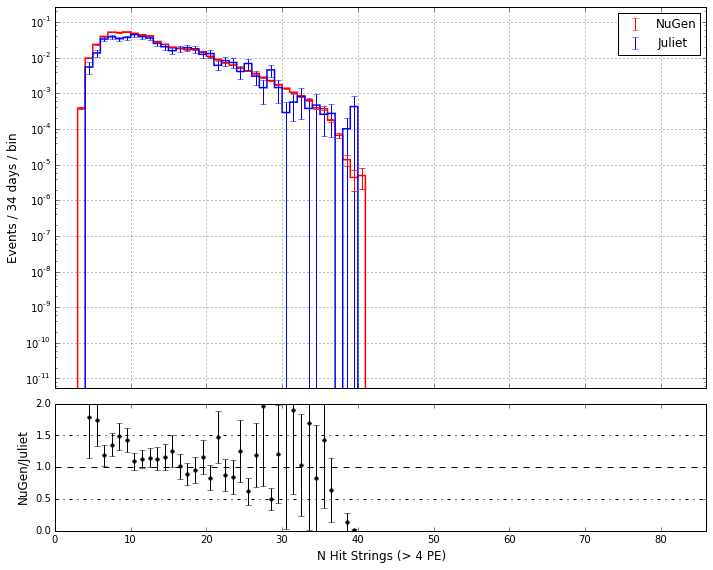

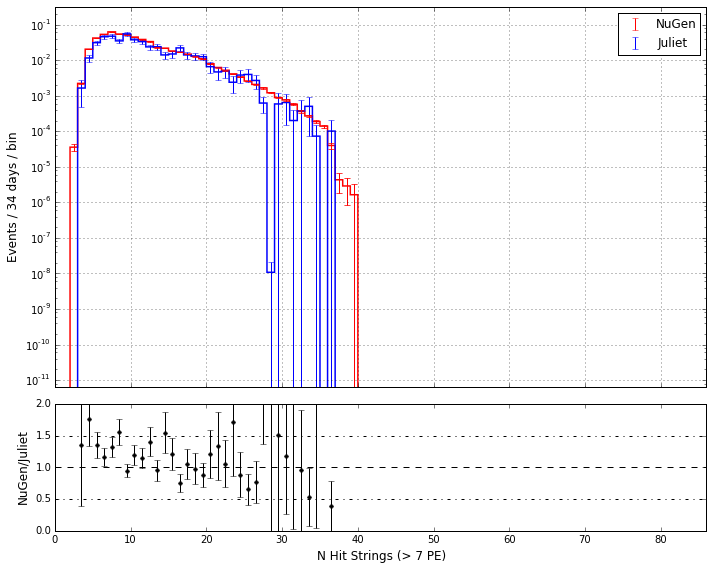

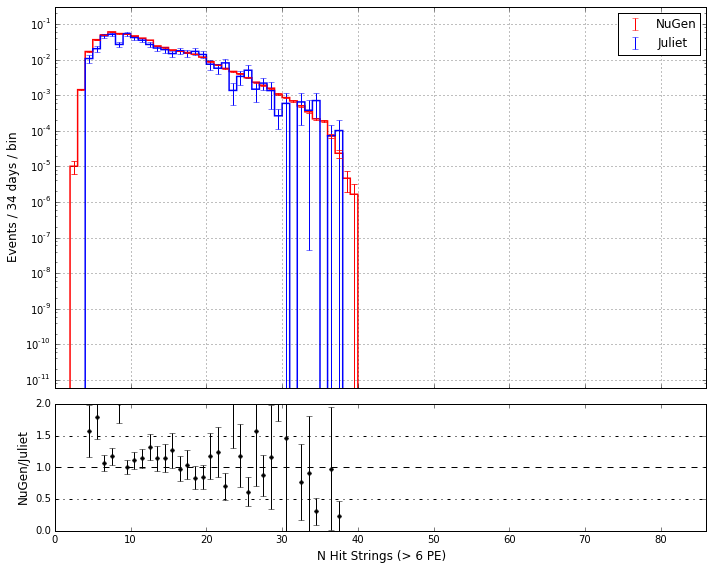

In [31]:
# Loop over variables and plot
#savedir = '../plots/JulietComp/baseline_wimplf/'
for var in variables:
    lims = variables[var]
    
    #plot(info, var, lims[4], lims[0], lims[1], lims[2], True)
    pt.plotStackedRatio(info,var,
                        lims[4],
                        lims[0],lims[1],lims[2],
                        1e-10,True,False,False,'',
                       'NuGen/Juliet')
    
    #plt.savefig(savedir+lims[3]+'.png')


In [32]:
# Now include the qratio requirement
nue_juliet_reg = qlayerCut(nue_juliet_reg,False,0.8)
nue_nugen_reg  = qlayerCut(nue_nugen_reg,False,0.8)

info = {'data' : [nue_nugen_reg, nue_juliet_reg],
        'names'  : ['NuGen', r'Juliet'],
        'colors'  : ['r','b'],
        'weights'    : ['wE2','wE2'],
        'ls'   : ['solid','solid'],
        'lw' : [1.5,1.5],
        'marker' : [' ',' ']
       }

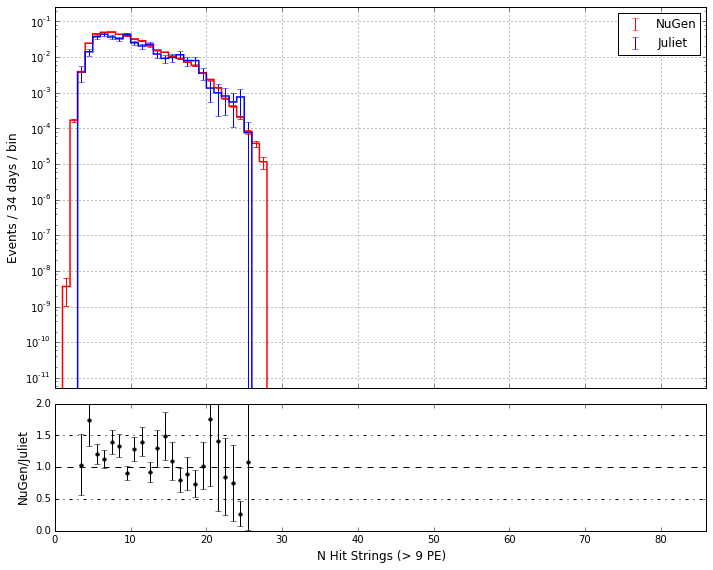

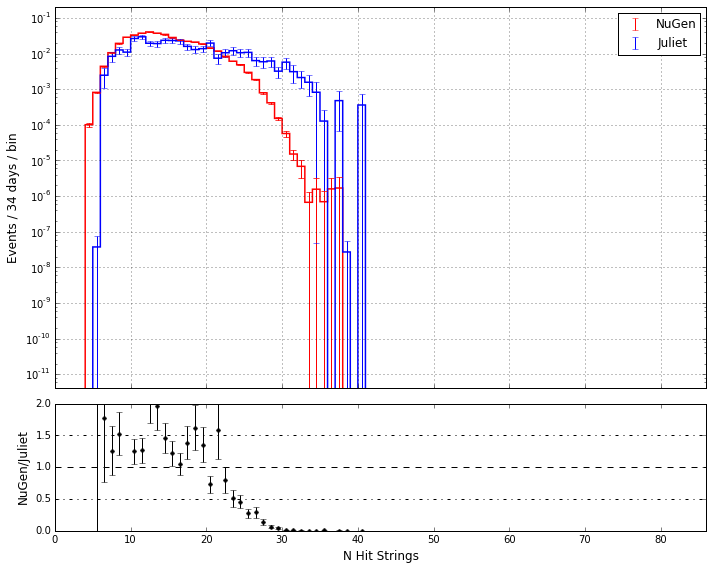

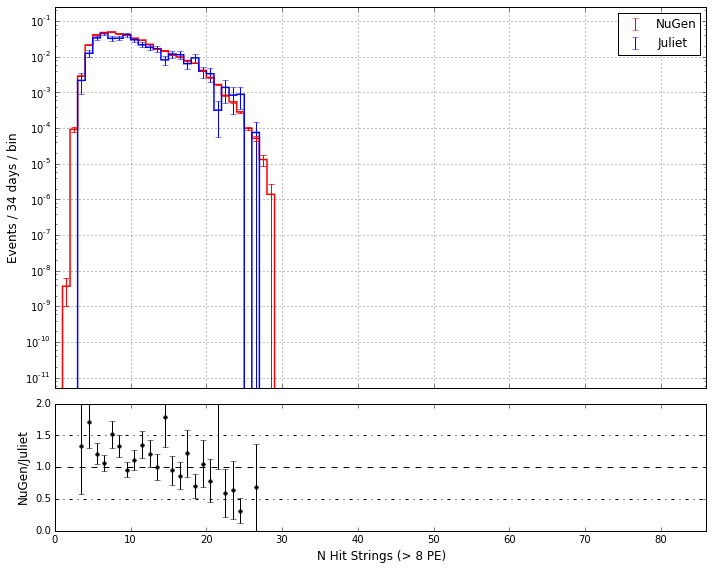

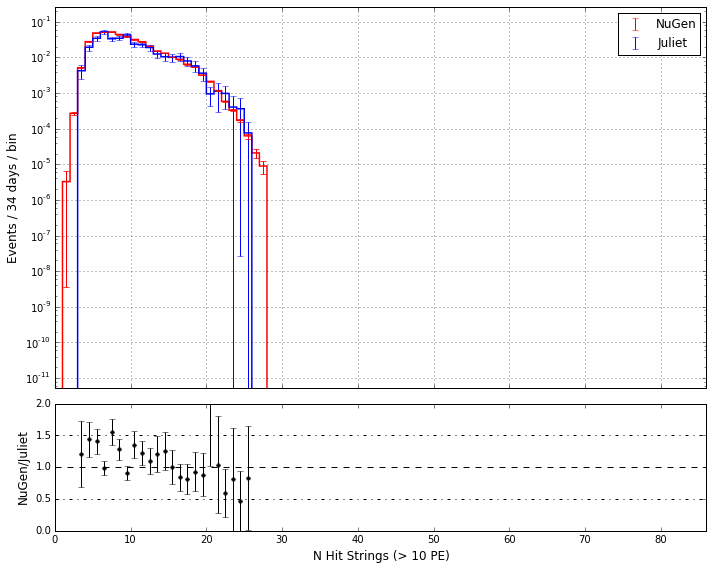

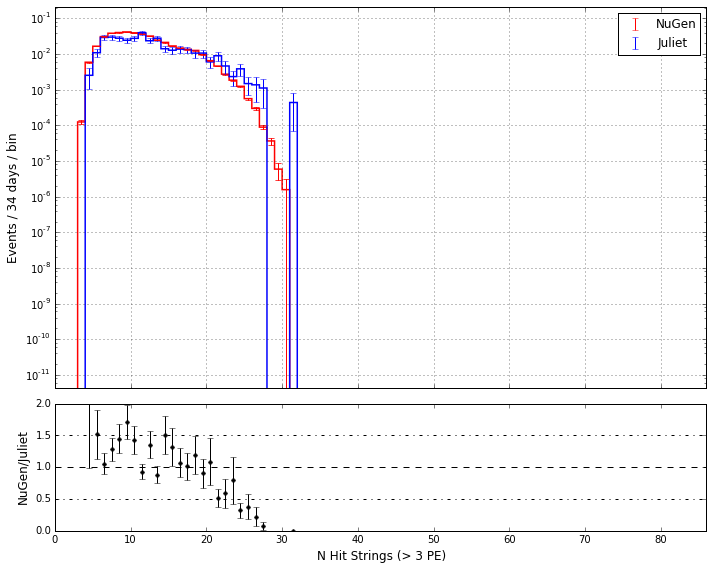

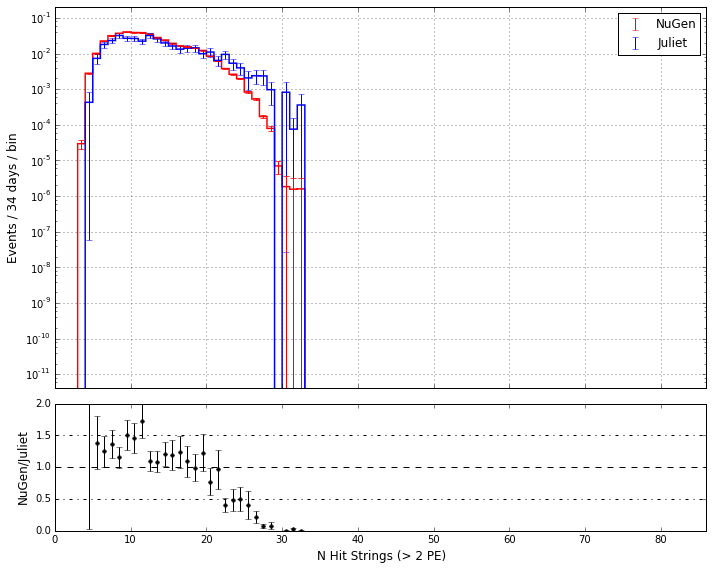

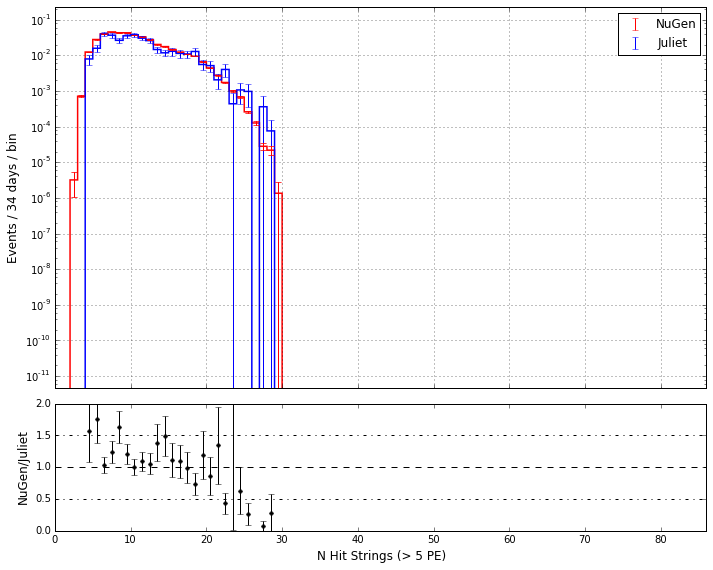

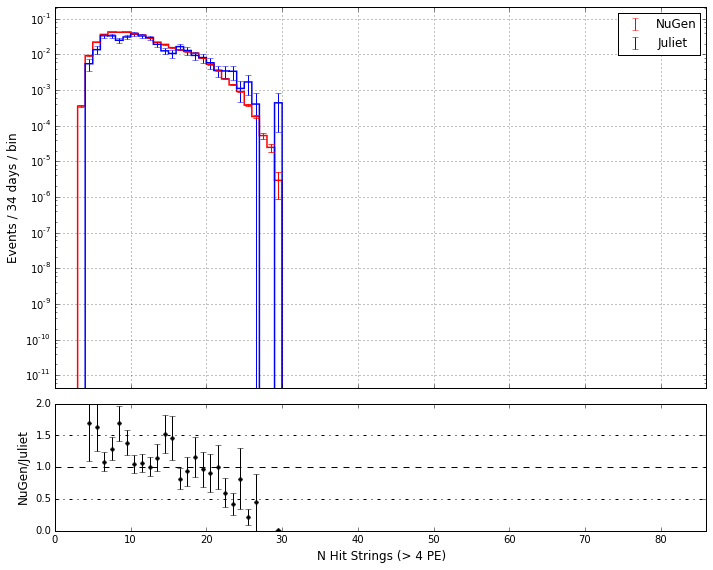

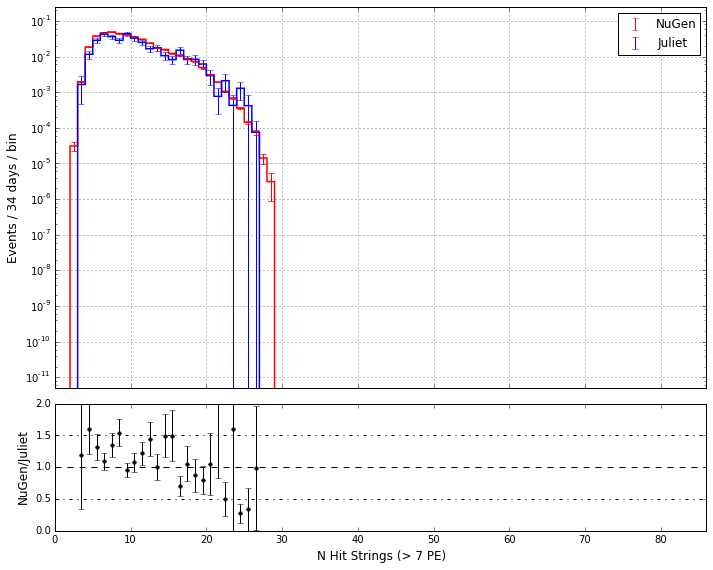

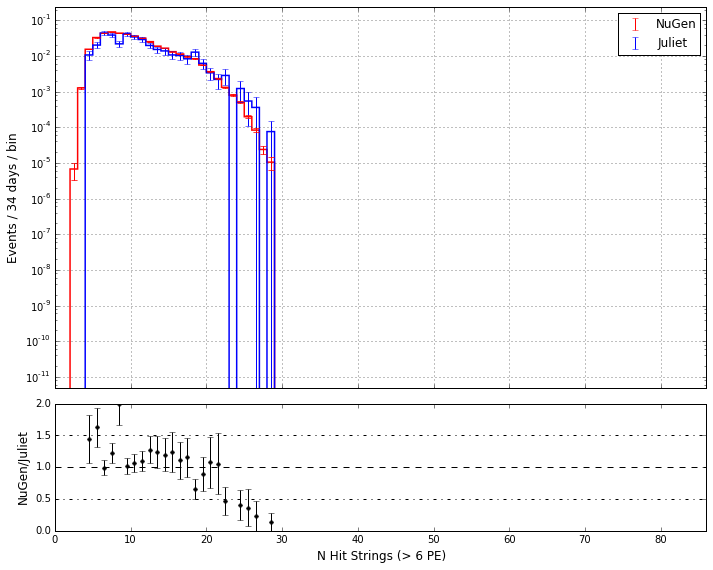

In [33]:
# Loop over variables and plot
savedir = '../plots/JulietComp/baseline_wimplf_qratio_domsimulator_StringCheck/'
for var in variables:
    lims = variables[var]
    
    #plot(info, var, lims[4], lims[0], lims[1], lims[2], True)
    pt.plotStackedRatio(info,var,
                        lims[4],
                        lims[0],lims[1],lims[2],
                        1e-10,True,False,False,'',
                       'NuGen/Juliet')
    
    plt.savefig(savedir+lims[3]+'.png')

In [34]:
# Include the timing cut and balloon cut
def finalcuts(dt):
    dt = dt[ dt['tlarge5[0]-tearly5[0]'] < 200 ]
    dt = balloonCut(dt)
    return dt

nue_juliet_reg = finalcuts(nue_juliet_reg)
nue_nugen_reg  = finalcuts(nue_nugen_reg)

In [35]:
info = {'data' : [nue_nugen_reg, nue_juliet_reg],
        'names'  : ['NuGen', r'Juliet'],
        'colors'  : ['r','b'],
        'weights'    : ['wE2','wE2'],
        'ls'   : ['solid','solid'],
        'lw' : [1.5,1.5],
        'marker' : [' ',' ']
       }

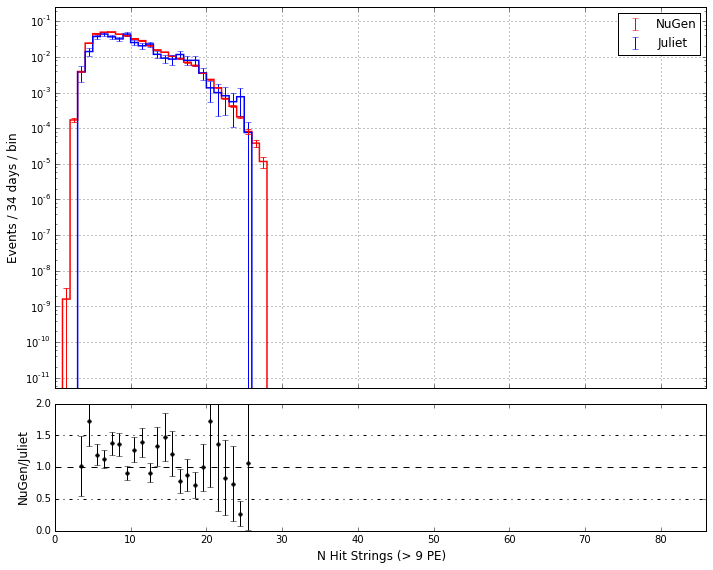

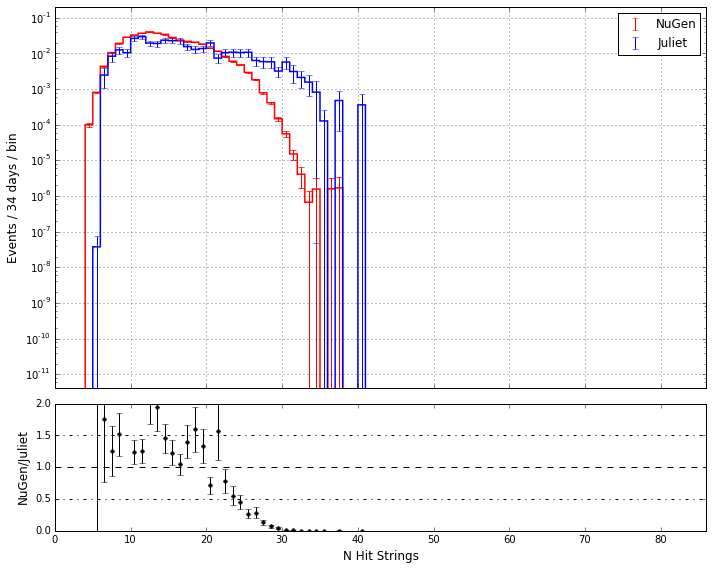

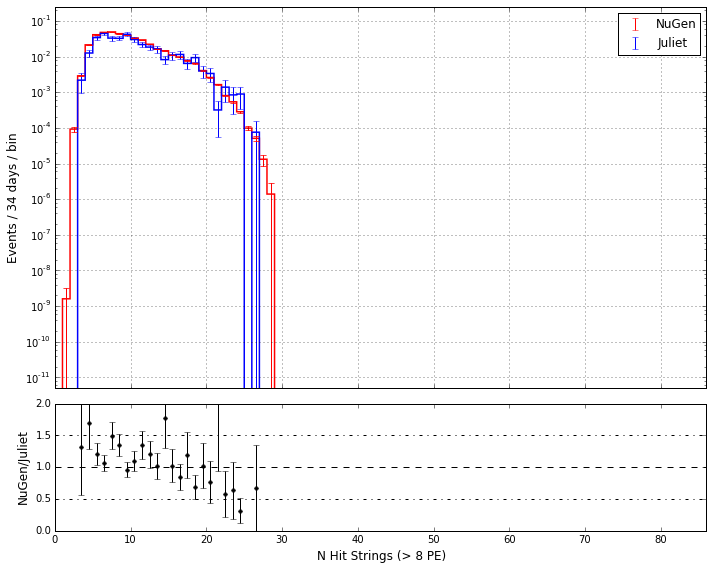

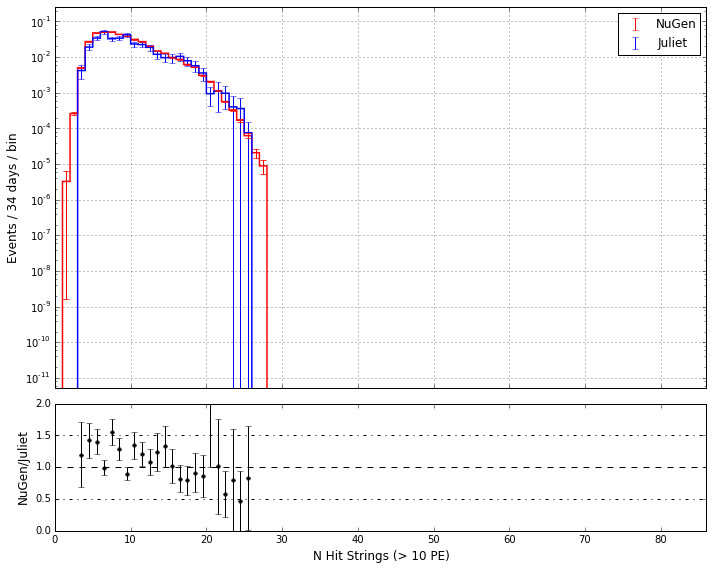

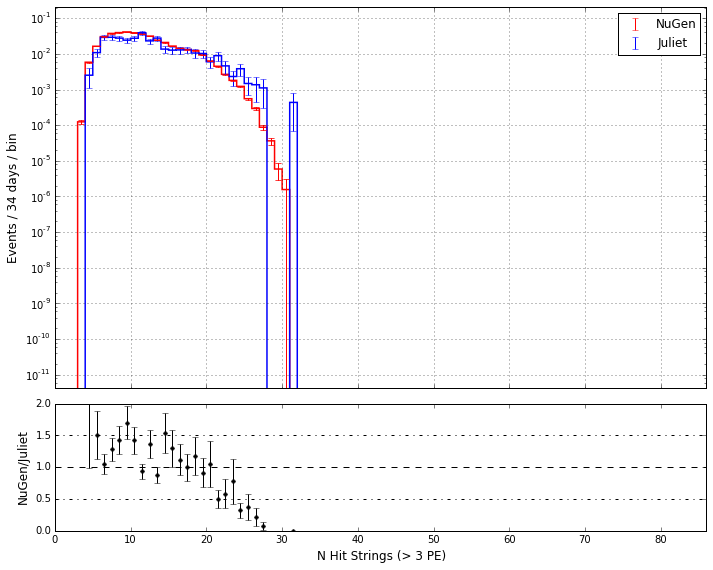

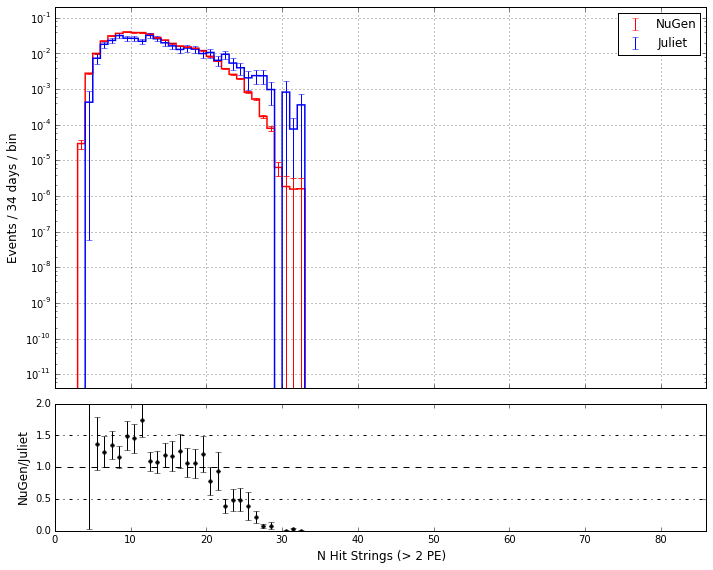

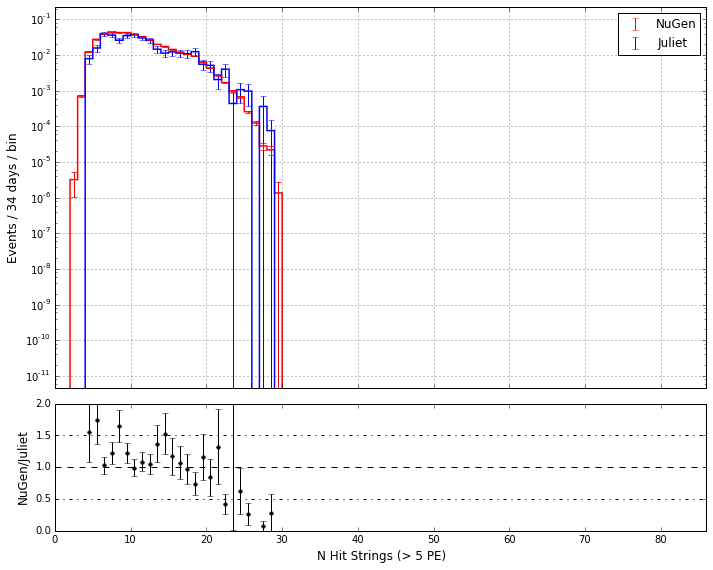

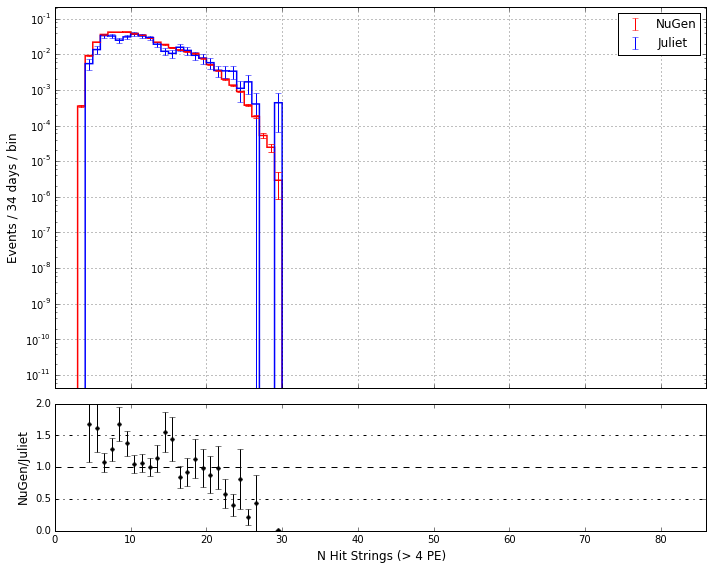

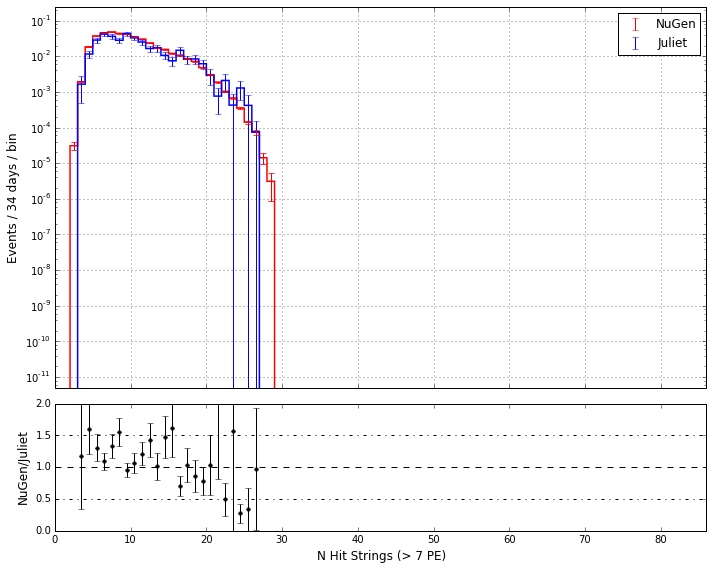

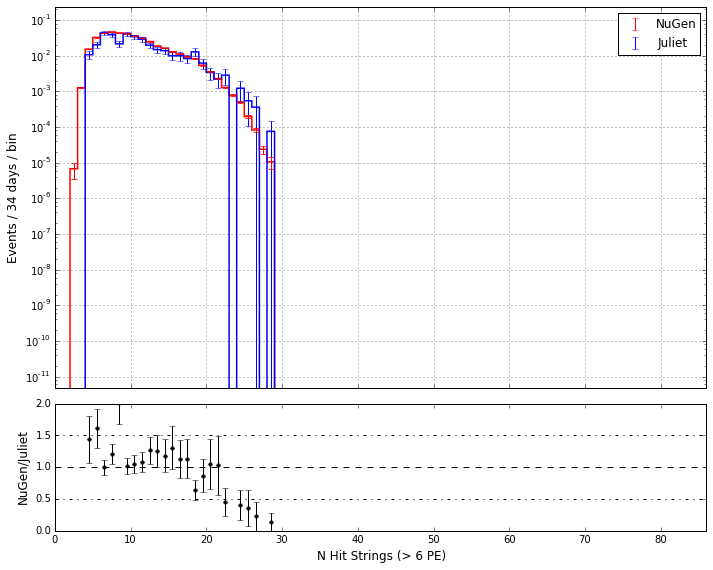

In [36]:
# Loop over variables and plot
savedir = '../plots/JulietComp/baseline_wimplf_qratio_timing_ballooncut_domsimulator_StringCheck/'
for var in variables:
    lims = variables[var]
    
    #plot(info, var, lims[4], lims[0], lims[1], lims[2], True)
    pt.plotStackedRatio(info,var,
                        lims[4],
                        lims[0],lims[1],lims[2],
                        1e-10,True,False,False,'',
                       'NuGen/Juliet')
    
    plt.savefig(savedir+lims[3]+'.png')